<a href="https://colab.research.google.com/github/DikshantBadawadagi/Apriori_Algorithm/blob/main/Apriori%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-10-07 09:44:57--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip’

online+retail.zip       [      <=>           ]  22.62M  20.3MB/s    in 1.1s    

2024-10-07 09:44:59 (20.3 MB/s) - ‘online+retail.zip’ saved [23715478]

[<ZipInfo filename='Online Retail.xlsx' filemode='-rwx------' file_size=23715344>]
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEAR

<ipython-input-1-e65cf8e242b1>:69: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  subset_df = subset_df.applymap(hot_encode)


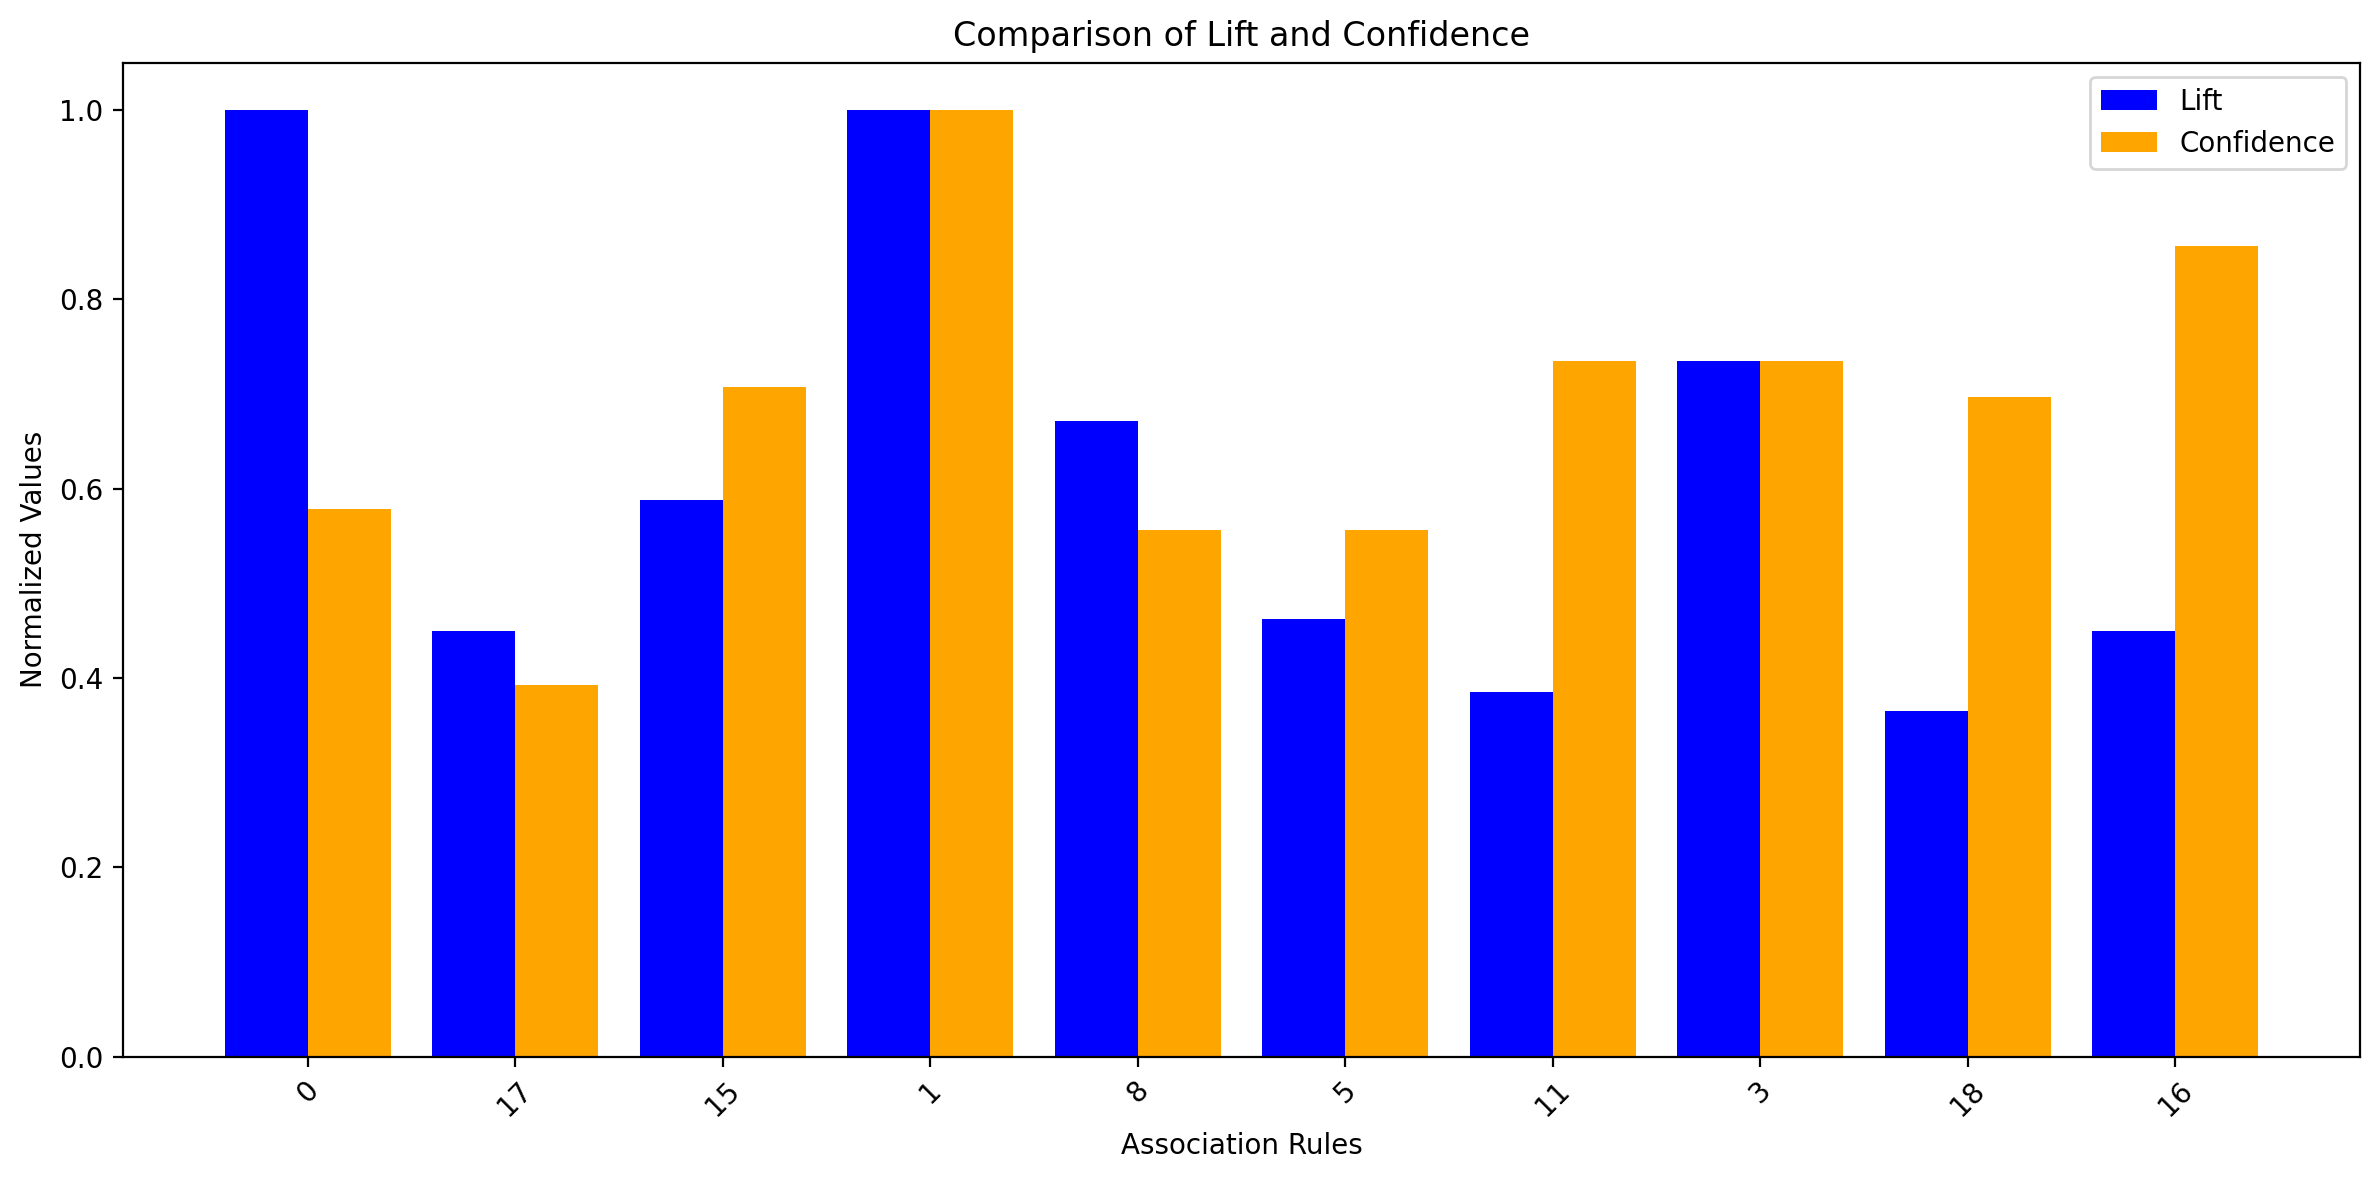

In [1]:
# Step 1: Install the required libraries
!pip install pandas numpy mlxtend matplotlib

# Step 2: Import the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
%matplotlib inline

# Step 3: Load the data set
# Download the data set
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

# Extract the files
import zipfile
with zipfile.ZipFile('online+retail.zip', 'r') as datafilezip:
    print(datafilezip.infolist())
    datafilezip.extract("Online Retail.xlsx")

# Load the data set
df = pd.read_excel('Online Retail.xlsx')

# Step 4: Explore the data set
# Extract the first five entries
print(df.head())

# Access the list of column names
colnames = df.columns
print(colnames)

# Extract the list of countries
print(df.Country.unique())

# Step 5: Clean the data set
# Length of the dataframe before cleaning
print(len(df))

# Identify entries with "C" in the invoice number
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
print(df[df['InvoiceNo'].str.contains('C')].head())

# Identify entries with "A" in the invoice number
print(df[df['InvoiceNo'].str.contains('A')])

# Exclude unnecessary entries from the dataframe
df = df[~df['InvoiceNo'].str.contains('C|A')]
print(len(df))

# Step 6: Prepare the data set
# Grouping data for specific countries
subset_df = df[df['Country'].isin(['Denmark', 'Germany', 'Italy'])]
subset_df = subset_df.groupby(['InvoiceNo', 'Description'])['Quantity'].sum()

# Unpack the data
subset_df = subset_df.unstack().reset_index()

# Replace the NaN values and make the invoice number the index
subset_df = subset_df.fillna(0)
subset_df = subset_df.set_index('InvoiceNo')

# Remove POSTAGE entries
subset_df = subset_df.drop("POSTAGE", axis=1)

# Encode the data
def hot_encode(x):
    return x > 0

subset_df = subset_df.applymap(hot_encode)

# Step 7: Apply the Apriori algorithm
frq_items = apriori(subset_df, min_support=0.05, use_colnames=True)
frq_items.sort_values(['support'], ascending=[False])

# Apply association rules
rules = association_rules(frq_items, metric='lift', min_threshold=1)
rules.sort_values(['lift'], ascending=[False])

# Step 8: Evaluation of the result
# Random sampling of association rules for comparison of confidence and lift values
rules_random = rules.sample(10, random_state=42)
rules_lift = rules_random[['lift']].to_numpy()
rules_lift = (rules_lift / rules_lift.max()).transpose()[0]
rules_conf = rules_random[['confidence']].to_numpy()
rules_conf = (rules_conf / rules_conf.max()).transpose()[0]

# Plotting
width = 0.40
plt.figure(figsize=(12, 6), dpi=200)
plt.bar(np.arange(len(rules_lift)), rules_lift, width=width, label='Lift', color='blue', align='center')
plt.bar(np.arange(len(rules_conf)) + width, rules_conf, width=width, label='Confidence', color='orange', align='center')
plt.xlabel('Association Rules')
plt.ylabel('Normalized Values')
plt.title('Comparison of Lift and Confidence')
plt.xticks(np.arange(len(rules_lift)) + width / 2, rules_random.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
